<a href="https://colab.research.google.com/github/JadonTelep/MAT-422/blob/main/SP_24_MAT_422_2_3_Independent_Variables_And_Random_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2 - Probability**

##2.3 Independent Variables And Random Samples

### 2.3.1 Joint probability distributions

In real life, we are often interested in several random variables that are related to each other. Joint probability is the probability of two or more events happening together. A joint probability distribution shows a probability distribution for two (or more) random variables.

#### 2.3.1.1 Two discrete random variables

The probability mass function (pmf) of a single discrete random variable $X$ can be extended to two variables $X, Y$ for describing how much probability mass is placed on each possible pair of values $(x, y)$.

**Definition 2.3.1.** Let $X$ and $Y$ be two discrete random variable's defined on the sample space $S$ of an experiment. The **joint probability mass function** $p(x, y)$ is defined for each pair of numbers $(x, y)$ by
$$
p(x, y)=P(X=x \text { and } Y=y)
$$

It must be the case that $p(x, y) \geq 0$ and $\sum_{x} \sum_{y} p(x, y)=1$.
The marginal distribution of a subset of a collection of random variables is the probability distribution of the variables contained in the subset without reference to the values of the other variable.

**Definition 2.3.2.** The **marginal probability mass function of** $X$, denoted by $p_{X}(x)$, is given by
$$
p_{X}(x)=\sum_{y: p(x, y)>0} p(x, y) \quad \text { for each possible value } x
$$

Similarly, the **marginal probability mass function of** $Y$ is
$$
p_{Y}(y)=\sum_{x: p(x, y)>0} p(x, y) \quad \text { for each possible value } y
$$

**EXAMPLE:** Use scipy library to calculate Joint Probability Mass Function (pmf) for two **independent** binomal distribution. n and p are shape parameters. n is the number of trials. p is the probabilty of a S (success). For two independent $X$ and $Y$, $p(x, y)=P(X=x \text { and } Y=y) = P(X=x) \cdot P(Y=y)$. Thus the pmf(x,y) will be the outer product of pmf(x) and pmf(y).

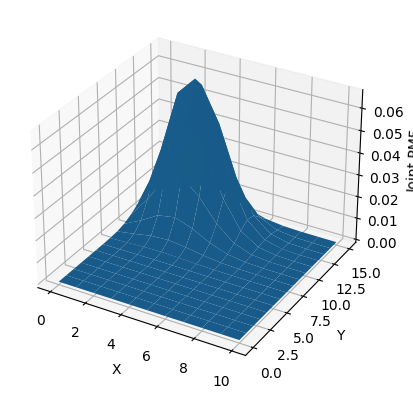

In [16]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the first binomial distribution
n1 = 10
p1 = 0.3

# Parameters for the second binomial distribution
n2 = 15
p2 = 0.8

# Create the two binomial distributions
rv1 = binom(n1, p1)
rv2 = binom(n2, p2)

# Calculate the probability mass functions for each distribution
x = np.arange(0, n1 + 1)
y = np.arange(0, n2 + 1)
pmf1 = rv1.pmf(x)
pmf2 = rv2.pmf(y)

# Calculate the joint probability mass function
joint_pmf = np.outer(pmf1, pmf2)

# Create the figure and axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the meshgrid
X, Y = np.meshgrid(x, y)

# Transpose joint_pmf so it has the same shape as X and Y
joint_pmf = joint_pmf.T

# Plot the surface
ax.plot_surface(X, Y, joint_pmf)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Joint PMF')

# Display the plot
plt.show()

**EXAMPLE:** Use scipy library to calculate Joint Probability Mass Function (pmf) for two **dependent** binomal distribution. Because $X$ and $Y$ are dependent

$$p(x, y) \neq P(X=x) \cdot P(Y=y)$$

Instead

$$P(X=x)=\binom{n_1}{x} p_1^x\left(1-p_1\right)^{n_1-x}\text { for }x=0,1, \ldots, n_1$$
$$P(Y=y)=\binom{n_2}{y} p_2^y\left(1-p_2\right)^{n_2-y}\text { for } y=0,1, \ldots, n_2$$

Create a basic dependency condition such that $y \leq x + 5$ so that

$$P(X=x, Y=y)= \begin{cases}P(X=x) \cdot P(Y=y) & \text { if } y \leq x+5 \\ 0 & \text { otherwise }\end{cases}$$


In [10]:
import numpy as np
import pandas as pd
from scipy.stats import binom

# Parameters for the first binomial distribution
n1 = 10
p1 = 0.3

# Parameters for the second binomial distribution
n2 = 15
p2 = 0.8

# Create the two binomial distributions
rv1 = binom(n1, p1)
rv2 = binom(n2, p2)

# Define the possible outcomes for X and Y
X = np.arange(0, n1 + 1)
Y = np.arange(0, n2 + 1)

joint_pmf = pd.DataFrame(index=X, columns=Y)

# Calculate the joint pmf
for x in X:
    for y in Y:
        # Define a dependency: e.g., if X = x, limit Y's outcomes (e.g., Y can be at most x + 5)
        if y <= x + 5:  # Arbitrary dependency condition
            joint_pmf.loc[x, y] = rv1.pmf(x) * rv2.pmf(y)  # Multiply pmfs
        else:
            joint_pmf.loc[x, y] = 0  # If the condition is not met, probability is 0

# Convert the DataFrame to a numerical format
joint_pmf = joint_pmf.astype(float)

# Display the joint pmf
print(joint_pmf)

              0             1             2             3             4   \
0   9.256149e-13  5.553689e-11  1.555033e-09  2.695391e-08  3.234469e-07   
1   3.966921e-12  2.380153e-10  6.664427e-09  1.155167e-07  1.386201e-06   
2   7.650490e-12  4.590294e-10  1.285282e-08  2.227823e-07  2.673387e-06   
3   8.743418e-12  5.246051e-10  1.468894e-08  2.546083e-07  3.055300e-06   
4   6.557563e-12  3.934538e-10  1.101671e-08  1.909562e-07  2.291475e-06   
5   3.372461e-12  2.023477e-10  5.665735e-09  9.820607e-08  1.178473e-06   
6   1.204450e-12  7.226702e-11  2.023477e-09  3.507360e-08  4.208831e-07   
7   2.949674e-13  1.769805e-11  4.955453e-10  8.589452e-09  1.030734e-07   
8   4.740548e-14  2.844329e-12  7.964121e-11  1.380448e-09  1.656537e-08   
9   4.514808e-15  2.708885e-13  7.584877e-12  1.314712e-10  1.577654e-09   
10  1.934918e-16  1.160951e-14  3.250662e-13  5.634480e-12  6.761376e-11   

              5             6             7             8             9   \
0   2.84633

#### 2.3.1.2 Two continuous random variables

The joint continuous distribution is the continuous analogue of a joint discrete distribution. For that reason, all of the conceptual ideas will be equivalent, and the formulas will be the continuous counterparts of the discrete formulas. The probability that the pair $(X, Y)$ of continuous random variables falls in a two-dimensional set $A$ (such as a rectangle) is obtained by integrating a function called the joint density function.

**Definition 2.3.3.** Let $X$ and $Y$ be continuous random variables. A joint probability density function $f(x, y)$ for these two variables is a function satisfying $f(x, y) \geq 0$ and $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) d x d y=1$. Then for any twodimensional set $A$,
$$
P[(X, Y) \in A]=\iint_{A} f(x, y) d x d y
$$

In particular, if $A$ is the two-dimensional rectangle $\{(x, y): a \leq x \leq b, c \leq$ $y \leq d\}$ then
$$
P[(X, Y) \in A]=P(a \leq X \leq b, c \leq Y \leq d)=\int_{a}^{b} \int_{c}^{d} f(x, y) d y d x
$$

If $f(x, y)$ is a surface at height $f(x, y)$ above the point $(x, y)$ in a threedimensional coordinate system. Then $P[(X, Y) \in A]$ is the volume underneath this surface and above the region $A$, analogous to the area under a curve in the case of a single random variable. This is illustrated in Fig. 2.5. The marginal probability density function of continuous random variables can be defined analogously.

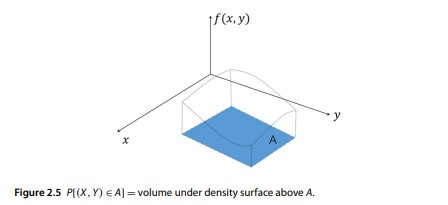

**Definition 2.3.4.** The **marginal probability density functions** of $X$ and $Y$, denoted by $f_{X}(x)$ and $f_{Y}(\gamma)$, respectively, are given by
$$
\begin{array}{ll}
f_{X}(x)=\int_{-\infty}^{\infty} f(x, y) d y & \text { for }-\infty<x<\infty \\
f_{Y}(y)=\int_{-\infty}^{\infty} f(x, y) d x & \text { for }-\infty<y<\infty
\end{array}
$$


#### 2.3.1.3 Independent random variables

The concept of independent random variables is very similar to independent events. In many situations, information about the observed value of one of the two variables $X$ and $Y$ gives information about the value of the other variable. Independent random variables describe a situation where the occurrence of one does not affect the probability of occurrence of the other (equivalently, does not affect the odds). One way of defining independence of two events is via the condition $P(A \cap B)=P(A) \cdot P(B)$. Here is an analogous definition for the independence of two random variables.

**Definition 2.3.5.** Two random variables $X$ and $Y$ are said to be **independent** if for every pair of $x$ and $y$ values,
$$
p(x, y)=p_{X}(x) \cdot p_{Y}(y) \quad \text { when } X \text { and } Y \text { are discrete }
$$
or
$$
f(x, y)=f_{X}(x) \cdot f_{Y}(y) \quad \text { when } X \text { and } Y \text { are continuous. }
$$

If the above is not satisfied for all $(x, y)$, then $X$ and $Y$ are said to be dependent.

**Example 2.3.6.** Suppose that the lifetimes of two components are independent of one another and that the first lifetime, $X_{1}$, has an exponential
distribution with parameter $\lambda_{1}$, whereas the second, $X_{2}$, has an exponential distribution with parameter $\lambda_{2}$. Then the joint pdf is
$$
\begin{aligned}
f\left(x_{1}, x_{2}\right) & =f_{X_{1}}\left(x_{1}\right) \cdot f_{X_{2}}\left(x_{2}\right) \\
& =\left\{\begin{array}{cc}
\lambda_{1} e^{-\lambda_{1} x_{1}} \cdot \lambda_{2} e^{-\lambda_{2} x_{2}}=\lambda_{1} \lambda_{2} e^{-\lambda_{1} x_{1}-\lambda_{2} x_{2}} & x_{1}>0, x_{2}>0 \\
0 & \text { otherwise }
\end{array}\right.
\end{aligned}
$$

Let $\lambda_{1}=1 / 1100$ and $\lambda_{2}=1 / 1300$, so that the expected lifetimes are 1100 hours and 1300 hours, respectively. The probability that both component lifetimes are at least 1400 hours is
$$
\begin{aligned}
P\left(1400 \leq X_{1}, 1400 \leq X_{2}\right) & =P\left(1400 \leq X_{1}\right) \cdot P\left(1400 \leq X_{2}\right) \\
& =e^{-\lambda_{1}(1400)} \cdot e^{-\lambda_{2}(1400)} \\
& =(.28)(.34)=.0952
\end{aligned}
$$

We can extend the concept of a joint distribution of two variables to more than two random variables.

**Definition 2.3.7.** If $X_{1}, X_{2}, \ldots, X_{n}$ are all discrete random variables, the joint pmf of the variables is the function
$$
p\left(x_{1}, x_{2}, \ldots, x_{n}\right)=P\left(X_{1}=x_{1}, X_{2}=x_{2}, \ldots, X_{n}=x_{n}\right)
$$

If the variables are continuous, the joint pdf of $X_{1}, \ldots, X_{n}$ is the function $f\left(x_{1}, x_{2}, \ldots, x_{n}\right)$ such that for any $n$ intervals $\left[a_{1}, b_{1}\right], \ldots,\left[a_{n}, b_{n}\right]$,
$$
P\left(a_{1} \leq X_{1} \leq b_{1}, \ldots, a_{n} \leq X_{n} \leq b_{n}\right)=\int_{a_{1}}^{b_{1}} \ldots \int_{a_{n}}^{b_{n}} f\left(x_{1}, \ldots, x_{n}\right) d x_{n} \ldots d x_{1}
$$

**Definition 2.3.8.** The random variables $X_{1}, X_{2}, \ldots, X_{n}$ are said to be **independent** if for every subset $X_{i_{1}}, X_{i_{2}}, \ldots, X_{i_{k}}$ of the variables (each pair, each triple, and so on), the joint pmf or pdf of the subset is equal to the product of the marginal pmf's or pdf's.


### 2.3.2 Correlation and dependence

Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. Covariance is a measure of the joint variability of two random variables.

#### 2.3.2.1 Correlation for random variables

When two random variables $X$ and $Y$ are not independent, it is frequently of interest to assess how strongly they are related to one another.

**Definition 2.3.9.** Let $X$ and $Y$ be jointly distributed random variables with $\operatorname{pmf} p(x, y)$ or $\operatorname{pdf} f(x, y)$ according to whether the variables are discrete or continuous. The **covariance** between two random variables $X$ and $Y$ is
$$
\begin{aligned}
\operatorname{Cov}(X, Y) & =E\left[\left(X-\mu_{X}\right)\left(Y-\mu_{Y}\right)\right] \\
& = \begin{cases}\sum_{x} \sum_{y}\left(x-\mu_{X}\right)\left(y-\mu_{Y}\right) p(x, y), & X, Y \text { discrete } \\
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\left(x-\mu_{X}\right)\left(y-\mu_{Y}\right) f(x, y) d x d y, & X, Y \text { continuous }\end{cases}
\end{aligned}
$$

Fig. 2.6 has three cases when the covariance is positive, negative, and near zero. Since $X-\mu_{X}$ and $Y-\mu_{Y}$ are the deviations of the two variables from their respective mean values the covariance is the expected product of deviations. Note that $\operatorname{Cov}(X, X)=E\left[\left(X-\mu_{X}\right)^{2}\right]=V(X)$.

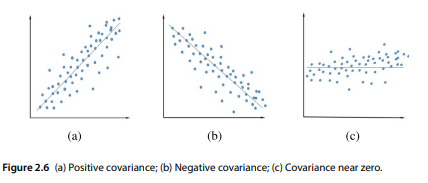

The correlation coefficient is the covariance of the two variables divided by the product of their standard deviations, which is a measure of linear correlation between two variables or sets of data.

**Definition 2.3.10.** The **correlation coefficient** of $X$ and $Y$, denoted by $\operatorname{Corr}(X, Y), \rho_{X, Y}$, or just $\rho$, is defined by
$$
\rho_{X, Y}=\frac{\operatorname{Cov}(X, Y)}{\sigma_{X} \cdot \sigma_{Y}}
$$

**Proposition 2.3.11.** Correlation coefficients have the following properties:
1. If $X$ and $Y$ are independent, then $\rho=0$, but $\rho=0$ does not imply independence.
2. $|\rho| \leq 1, \rho=1$ or -1 if $Y=a X+b$ for some numbers $a$ and $b$ with $a \neq 0$.

#### 2.3.2.2 Correlation for samples

Correlation coefficient, when applied to a sample, is commonly represented by $r_{x y}$ and may be referred to as the sample correlation coefficient or the sample Pearson correlation coefficient. We can obtain a formula for $r_{x y}$ by substituting estimates of the covariances and variances based on a sample into the formula above. Given paired data $\left\{\left(x_{1}, y_{1}\right), \ldots,\left(x_{n}, y_{n}\right)\right\}$ consisting of $n$ pairs,
$$
r_{x y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}
$$
where $\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}$ (the sample mean); and analogously for $\bar{y}$.
Fig. 2.7 shows the correlation coefficients of $x$ and $y$ for several data sets. Note that the correlation reflects the strength and direction of a linear relationship, but not the slope of that relationship, nor many aspects of nonlinear relationships.

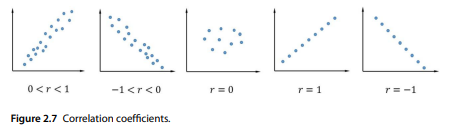

It is easy to verify the following result.
**Proposition 2.3.12.** The correlation coefficient for samples has the following properties:
- $r_{x y}=\frac{s_{x y}}{s_{x} s_{y}}$ where the sample covariance
$$
s_{x y}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)
$$
and the sample standard deviation
$$
s_{x}=\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}
$$
- If $y=a x+b$, then $r_{x y}=1$ or -1 if a is positive or negative.

The proof of the second part comes from the observation: $s_{(a x) y}=a s_{x y}$ and $s_{(x+a) y}=s_{x y}$ because $\overline{a x}=a \bar{x}$; if $y=x+a, s_{x}=s_{y}$; and if $y=a x, s_{y}=|a| s_{x}$; and $s_{x x}=s_{x}^{2}$. If $y=a x+b$, then $r_{x y}=1$ or -1 if $a$ is positive or negative.

### 2.3.3 Random samples

#### 2.3.3.1 Random samples

A simple random sample is a randomly selected subset of a population and often is used in practice.

Definition 2.3.13. The random variables $X_{1}, X_{2}, \ldots, X_{n}$ are said to form a (simple) **random sample** of size $n$ if:
1. The $X_{i}$ 's are independent random variables.
2. Every $X_{i}$ has the same probability distribution.

We can draw conclusions about the population mean $\mu$ using the sample mean $\bar{X}=\frac{1}{n}\left(X_{1}+\cdots+X_{n}\right)$. Some of the most frequently used inferential procedures are based on properties of the sampling distribution of $\bar{X}$. We review these relationships between $E(\bar{X})$ and $\mu$ and also among $V(\bar{X}), \sigma^{2}$, and $n$.

**Proposition 2.3.14.** Let $X_{1}, X_{2}, \ldots, X_{n}$ be a random sample from a distribution with mean value $\mu$ and standard deviation $\sigma$. Then:
1. $E(\bar{X})=\mu_{\bar{X}}=\mu$;
2. $V(\bar{X})=\sigma_{\bar{X}}^{2}=\sigma^{2} / n$ and $\sigma_{\bar{X}}=\sigma / \sqrt{n}$.

In addition, with $T_{o}=X_{1}+\cdots+X_{n}$ (the sample total), $E\left(T_{o}\right)=n \mu, V\left(T_{o}\right)=$ $n \sigma^{2}$, and $\sigma_{T_{o}}=\sqrt{n} \sigma$.

#### 2.3.3.2 The Central Limit Theorem

The central limit theorem (CLT) indicates that the properly normalized sum of independent random variables tends toward a normal distribution even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions. The formal statement of this result is the most important theorem of probability.

**Theorem 2.3.15** (The central limit theorem (CLT)). Let $X_{1}, X_{2}, \ldots, X_{n}$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^{2}$. Then if $n$ is sufficiently large, $\bar{X}$ has approximately a normal distribution with $\mu_{\bar{X}}=\mu$ and $\sigma_{\bar{X}}^{2}=\sigma^{2} / n$, and $T_{o}$ also has approximately a normal distribution with $\mu_{T_{o}}=n \mu$, $\sigma_{T_{o}}^{2}=n \sigma^{2}$. The larger the value of $n$, the better the approximation.